# Find my job
* small project in data science school (남지열, 박재근, 신은지)
![wordcloud1](./resource/wordcloud1.png)
___

## Why?
* 내가 하고 싶은 일은 무엇일까?
* 내가 잘 할 수 있는 일은 무엇일까?
* 나는 과연 데이터 사이언티스트로서 적합한 사람일까? 잘할 수 있을까?

## Goal
* 내가 가진 역량 및 성격을 입력 **(input)** = > 나에게 적합한 직업을 예측 **(output)**

## How?
* 데이터 수집
    * linkedin 웹사이트에서 키워드 ***'Data Scientist'***로 채용공고 검색 ***(y)***
    * 해당 공고에서 ***requirements & qualifications*** 크롤링 ***(X)***
    
    
* 분석 방법
    * Supervised learning
        * **Naive Bayesian**
            * Multinomial Naive Bayes
        * **$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$**
___

## < Workflow >
### 데이터수집 => 전처리 => 모델선택 => 계수추정 => 평가 => 개선작업 => 최종 성능평가
---
### 1. Data & Samples
* **input data** is string of job description(reponsibility&qualification)
* **target** is {class0, class1, class2} -> {***'Data Science', 'Digital Marketing', 'UX/UI Deginger'***}
---
![linkein](./resource/linkedin3.png)

In [1]:
categories = ['Data Science', 'Digital Marketing', 'UX/UI Designer']

df = pd.read_excel('./resource/job.xlsx')
X_train = df['X'].values
y_train = df['Y'].values
df.head()

,X,Y
1,"? MS or PhD in Machine Learning, Computer Vis...",0
2,Experience in data analysis and some involveme...,0
3,"Understands, evaluates, and elicits requiremen...",0
4,"Masters or Ph.D in Statistics, Applied Mathema...",0
5,"Responsibilities\nDesign, build, and launch ne...",0


### 2. Extracting features from text (Preprocessing)
* X_train_tfidf == X_train_tfidf_vect

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#or

tfidf_vect = TfidfVectorizer()
X_train_tfidf_vect = tfidf_vect.fit_transform(X_train)

print(X_train_tfidf != X_train_tfidf_vect)

### 3. Model Selection & Parameter search
* MultinomialNB
* SGD

In [3]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model.stochastic_gradient import SGDClassifier

best alpha :  2e-05
best score :  0.953333333333
   1-sigma :  0.0163299316186
sub_opt alpha :  1e-05
sub_opt score :  0.937003401715


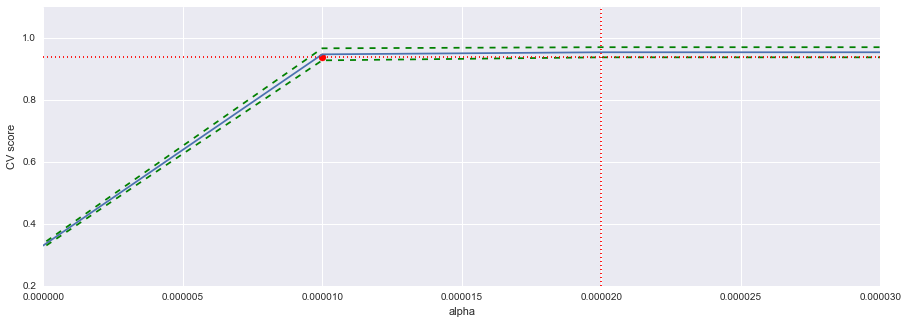

In [4]:
cv = StratifiedKFold(y_train, n_folds=5, random_state=0)

i_range = []
score_range = []
sigma = []

for a in np.arange(-5e-05, 5e-05, 1e-05):
    mnb = MultinomialNB(alpha = a)
    scores = np.zeros(5)
    
    for i, (train_idx, test_idx) in enumerate(cv):
        X_val = X_train_tfidf[train_idx]
        y_val = y_train[train_idx]
        X_test = X_train_tfidf[test_idx]
        y_test = y_train[test_idx]
        
        mnb.fit(X_val, y_val)
        y_pred = mnb.predict(X_test)
        
        scores[i] = np.mean(y_pred == y_test)
        
    i_range.append(a)
    score_range.append(np.mean(scores))
    sigma.append(np.std(scores))
    
best_idx = np.argmax(score_range)
best_alpha = i_range[best_idx]
best_score = score_range[best_idx]
sigma

plt.figure(figsize = (15, 5))
plt.plot(i_range, score_range)
plt.plot(i_range, np.array(score_range) + sigma, 'g--')
plt.plot(i_range, np.array(score_range) - sigma, 'g--')
plt.axhline(best_score - sigma[best_idx], linestyle=':', color='r')
plt.axvline(best_alpha, linestyle=':', color='r')

def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

sub_alpha = i_range[find_nearest(score_range, best_score - sigma[best_idx])]
sub_score = best_score - sigma[best_idx]

plt.scatter(sub_alpha, sub_score, color='r', s=50)
plt.xlim(0, 0.00003)
plt.ylabel('CV score')
plt.xlabel('alpha')

print("best alpha : ", best_alpha)
print("best score : ", best_score)
print("   1-sigma : ", sigma[best_idx])
print("="*25)
print("sub_opt alpha : ", sub_alpha)
print("sub_opt score : ", sub_score)

best alpha :  1e-05
best score :  0.986666666667
   1-sigma :  0.0124721912892
sub_opt alpha :  0.10001
sub_opt score :  0.974194475377


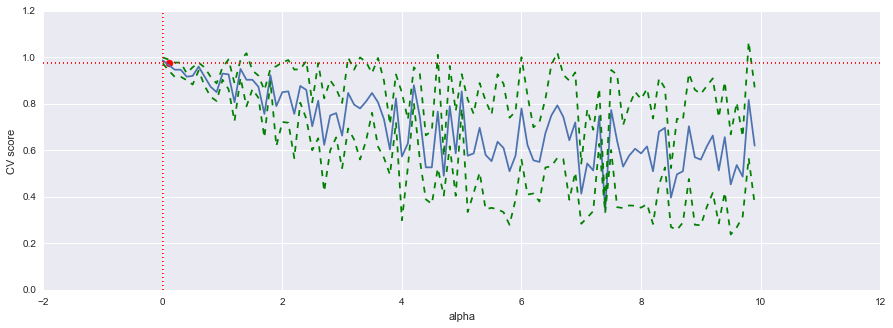

In [5]:
cv = StratifiedKFold(y_train, n_folds=5, random_state=0)

i_range = []
score_range = []
sigma = []

for a in np.arange(1e-5, 10, 0.1):
    sgd = SGDClassifier(alpha = a, loss='log')
    scores = np.zeros(5)
    
    for i, (train_idx, test_idx) in enumerate(cv):
        X_val = X_train_tfidf[train_idx]
        y_val = y_train[train_idx]
        X_test = X_train_tfidf[test_idx]
        y_test = y_train[test_idx]
        
        sgd.fit(X_val, y_val)
        y_pred = sgd.predict(X_test)
        
        scores[i] = np.mean(y_pred == y_test)
        
    i_range.append(a)
    score_range.append(np.mean(scores))
    sigma.append(np.std(scores))
    
best_idx = np.argmax(score_range)
best_alpha = i_range[best_idx]
best_score = score_range[best_idx]
sigma

plt.figure(figsize = (15, 5))
plt.plot(i_range, score_range)
plt.plot(i_range, np.array(score_range) + sigma, 'g--')
plt.plot(i_range, np.array(score_range) - sigma, 'g--')
plt.axhline(best_score - sigma[best_idx], linestyle=':', color='r')
plt.axvline(best_alpha, linestyle=':', color='r')

def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

sub_alpha = i_range[find_nearest(score_range, best_score - sigma[best_idx])]
sub_score = best_score - sigma[best_idx]

plt.scatter(sub_alpha, sub_score, color='r', s=50)
#plt.xlim(0, 0.00003)
plt.ylabel('CV score')
plt.xlabel('alpha')

print("best alpha : ", best_alpha)
print("best score : ", best_score)
print("   1-sigma : ", sigma[best_idx])
print("="*25)
print("sub_opt alpha : ", sub_alpha)
print("sub_opt score : ", sub_score)

### 4. Tuning & Improvement

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
    ])
#text_clf = text_clf.fit(X_train, y_train)

In [ ]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__stop_words': ['english', None],
    'tfidf__use_idf' : [True, False],
    'clf__alpha' : np.arange(-5e-05, 5e-05, 1e-05),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [ ]:
best_parameters, score, _ = max(gs_clf.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("{name}: {best}".format(
        name=param_name, best=best_parameters[param_name]
        ))
print("="*25)
print('score :', score)

### 5. Final test

In [ ]:
test_df = pd.read_excel('./resource/test.xlsx')
X_test = test_df['X'].values
y_test = test_df['Y'].values
test_df.head()

In [ ]:
final_clf = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2), stop_words='english')),
        ('clf', MultinomialNB(alpha=1e-05))
    ])
final_clf = final_clf.fit(X_train, y_train)

predicted = final_clf.predict(X_test)
print('='*20)
print("test score is :" ,np.mean(predicted == y_test))
print('='*20)

### 6. Prediction

In [ ]:
docs = [raw_input()]

predicted = final_clf.predict(docs)[0]
prob = final_clf.predict_proba(list(docs))[0]
prob_gap = np.max(prob) - np.median(prob)

if prob_gap > 0.4:
    print("\n==== Your job ====")
    print(categories[predicted])
    print("\n=== Probability ===")
    print(prob[predicted])
    
else:
    print("+++More detailed words please+++")

### docs = [raw_input()]

predicted = final_clf.predict(docs)[0]
prob = final_clf.predict_proba(list(docs))[0]
prob_gap = np.max(prob) - np.median(prob)

if prob_gap > 0.4:
    print("\n==== Your job ====")
    print(categories[predicted])
    print("\n=== Probability ===")
    print(prob[predicted])
    
else:
    print("+++More detailed words please+++")

### Sample Resume: Data Scientist
Core Competencies

Strategic Thinking: Able to influence the strategic direction of the company by identifying opportunities in large, rich data sets and creating and implementing data driven strategies that fuel growth including revenue and profits.

Modeling: Design and implement statistical / predictive models and cutting edge algorithms utilizing diverse sources of data to predict demand, risk and price elasticity. Experience with creating ETL processes to source and link data.

Analytics: Utilize analytical applications like SAS to identify trends and relationships between different pieces of data, draw appropriate conclusions and translate analytical findings into risk management and marketing strategies that drive value.

Drive Enhancements: Develop tools and reports that help users access and analyze data resulting in higher revenues and margins and a better customer experience.

Communications and Project Management: Capable of turning dry analysis into an exciting story that influences the direction of the business and communicating with diverse teams to take a project from start to finish. Collaborate with product teams to develop and support our internal data platform and to support ongoing analyses.

Skills and Tools

NoSQL data stores (Cassandra, MongoDB)
Hadoop, MySQL, Big Table, MapReduce, SAS
Large-scale, distributed systems design and development
Scaling, performance and scheduling and ETL techniques
C, C++, Java, Ruby on Rails

### Sample Resume: Digital Marketing Manager
Promoted to manage and revitalize negative-performing display channel (mobile, video, banners, and social). Oversight included campaign conceptualization, vendor prospecting, media buying/negotiating, campaign trafficking, data analysis, account optimization, secondary monetization partnerships, and new hire training. Also pioneered and developed Education Ad Network and internal ad network across 8 company websites.

Revived unprofitable display channel, generating $9.1 million in annual revenue growth and $2.1 million in annual margin dollars in less than 3 years.
Established and developed secondary monetization strategies and new revenue streams that drove $1.2 million in profit in 2013.
Boosted lead quality 80.2% by analyzing enrollment data, shifting media mix and enhancing marketing.
Increased channel margin by 400% in 2012. Also beat 2012 lead goal by 18%, bringing in $1.1 million in additional revenue.
Planned, executed, and optimized over 30 accounts at any given time, including high-profile vendors such Ad Roll, AOL, CareerBuilder, FutureAds, M&C Saatchi, Pandora, and Twitter.
Determined ad placement and pricing strategy, as well as developed direct advertiser and third-party relationships (AOL, Google, etc.) to build out highly profitable internal ad network.
Managed Marketing Coordinators, Ad Ops Manager, and interns, and established new department standards for training new hires.

### Sample Resume: UX/UI Designer
Skills
I synthesize the needs and goals of users, product managers, marketing and salespeople, user researchers, writers, localizers, developers and testers to ensure the best possible experience.

interaction design and documentation

Personas, user scenarios, UX specs, task flows, wireframes, site maps, storyboards, taxonomies, task flows, wireframes, mockups, prototypes, localization, accessibility, visual design and design patterns.
Know Windows client, server, phone and Windows Azure UX systems and guidelines.
prototyping and production

Low and high fidelity mockups on paper, with Photoshop, Fireworks, PowerPoint, Visio, HTML, WPF, Silverlight and WinRT.
Specialty in working directly with developers and testers to make what's designed happen in code.
Writing & illustrating brand and usage guidelines. Optimizing images, formatting text, sourcing stock photography, creating small Flash pieces and compiling XAML resource dictionaries.
technologies and tools

(X)HTML, HTML4/5, CSS1/2/3, JavaScript, jQuery, XML/XSLT, PHP, various CMS.
Windows Presentation Foundation (WPF), Silverlight 3 & 4 and ASP.NET (all in C#).
Apache, MySQL, IIS, SQL Server 2008 configuration and related basic system administration on Mac OS X, Linux, Windows Server 2008 R2 and Windows Server 2012.
Some familiarity with developing and deploying services built on Windows Azure and System Center 2012 Virtual Machine Manager.
other creative skills

Training in design, fine art drawing, painting, photography and scenography.
Work as stagehand, electrician and costume technician.
Studio photography and black-and-white darkroom experience.
Working knowledge of non-linear video editing and authoring with Final Cut Pro, Premiere, After Effects, QuickTime and Flash Video.
Print design of identities, logos, marketing collateral, apparel, signage, brand guidelines. Proficient with Illustrator, Freehand, PageMaker and InDesign.

## Word Cloud

### Data Science

In [ ]:
from wordcloud import WordCloud
ds_text = " ".join(df[df.Y == 0].X)
ds_text_adjusted = ds_text.lower().replace("skill", "").replace("experience", "")
dm_text = " ".join(df[df.Y == 1].X)
dm_text_adjusted = dm_text.lower().replace("skill", "").replace("experience", "")
ux_text = " ".join(df[df.Y == 2].X)
ux_text_adjusted = ux_text.lower().replace("skill", "").replace("experience", "")

wordcloud_ds = WordCloud(background_color='white', width=800, height=400).generate(ds_text_adjusted)
wordcloud_dm = WordCloud(background_color='white', width=800, height=400).generate(dm_text_adjusted)
wordcloud_ux = WordCloud(background_color='white', width=800, height=400).generate(ux_text_adjusted)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud_ds.recolor(random_state=4))
plt.xticks([])
plt.yticks([])
plt.grid(False)

### Digital Marketing

In [ ]:
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud_dm.recolor(random_state=31))
plt.xticks([])
plt.yticks([])
plt.grid(False)

### UX/UI Design

In [ ]:
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud_ux.recolor(random_state=33))
plt.xticks([])
plt.yticks([])
plt.grid(False)